#### Downlaod the dataset - https://www.kaggle.com/datasets/razinw/dog-vs-cat

In this project, I employed Convolutional Neural Networks (CNNs) to tackle the task of image classification. The goal was to build a machine learning model capable of distinguishing between images of dogs and cats. Using the "Dog vs Cat" dataset, I prepared and preprocessed the images, ensuring uniform size and normalized pixel values.

The heart of the project was the CNN architecture. I designed a series of convolutional layers to extract relevant features from the images. Pooling layers were integrated to reduce spatial dimensions, and fully connected layers were added to perform the final classification. By training the model on the labeled dataset, it learned to recognize distinguishing patterns and features in the images.

Throughout the training process, I paid close attention to factors like learning rate and batch size to optimize the model's performance. I used a validation set to monitor training progress and make adjustments to avoid overfitting. Once training was complete, I evaluated the model's accuracy on a separate test set, providing an unbiased measure of its effectiveness in classifying unseen images.

The project showcased the power of CNNs in solving image classification tasks, underscoring their ability to learn intricate patterns and nuances from visual data. The successful implementation of the CNN demonstrated the feasibility of using deep learning techniques for real-world applications like differentiating between dogs and cats based on images.

## Importing libraries

In TensorFlow, a tensor is a multi-dimensional array that represents data of various types, including scalars, vectors, matrices, and higher-dimensional arrays.

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

## Importing dataset
### Splitting training and testing data

In [62]:
train_dir = r"C:\Users\nikhi\Desktop\archive\train"
test_dir = r"C:\Users\nikhi\Desktop\archive\test"

### Data Preprocessing

 **generators -** We use this concept in our program because we have a huge dataset and we can't load all the data at once due to which RAM will get full and the program will crash. **Generators** in Keras are used to load and preprocess data in batches.
 
 Using Keras's **ImageDataGenerator** to preprocess image data for training and testing. This code scales the pixel values of your images between 0 and 1 by dividing them by 255.

In [63]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,     # The path to the directory containing training images
    target_size=(256,256),   # The dimensions to which images will be resized
    batch_size=32,      # 32 images per batch
    class_mode='binary'  # The type of classification (binary, categorical, etc.)
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


### Creating CNN Model Architecture

In [64]:
model = Sequential()

In [65]:
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 30, 30, 128)      

In [67]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-3), 
              metrics=['accuracy']
              )

### Model Training

In [68]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Use the total number of batches in the training generator
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,  # Use the total number of batches in the validation generator
)

Epoch 1/10


C:\Users\nikhi\AppData\Local\Temp\ipykernel_24372\2507218692.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


625/625 [==============================] - 838s 1s/step - loss: 0.6418 - accuracy: 0.6281 - val_loss: 0.5640 - val_accuracy: 0.7015
Epoch 2/10
625/625 [==============================] - 732s 1s/step - loss: 0.5247 - accuracy: 0.7387 - val_loss: 0.5087 - val_accuracy: 0.7514
Epoch 3/10
625/625 [==============================] - 766s 1s/step - loss: 0.4372 - accuracy: 0.7964 - val_loss: 0.4512 - val_accuracy: 0.7871
Epoch 4/10
625/625 [==============================] - 659s 1s/step - loss: 0.3620 - accuracy: 0.8384 - val_loss: 0.3732 - val_accuracy: 0.8389
Epoch 5/10
625/625 [==============================] - 652s 1s/step - loss: 0.2831 - accuracy: 0.8805 - val_loss: 0.3405 - val_accuracy: 0.8596
Epoch 6/10
625/625 [==============================] - 632s 1s/step - loss: 0.2043 - accuracy: 0.9173 - val_loss: 0.3857 - val_accuracy: 0.8642
Epoch 7/10
625/625 [==============================] - 641s 1s/step - loss: 0.1361 - accuracy: 0.9480 - val_loss: 0.4770 - val_accuracy: 0.8656
Epoch 8/10

### Visualizing the performance of the model

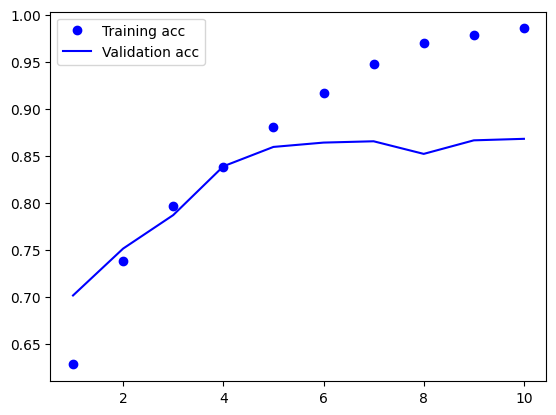

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()

plt.show()

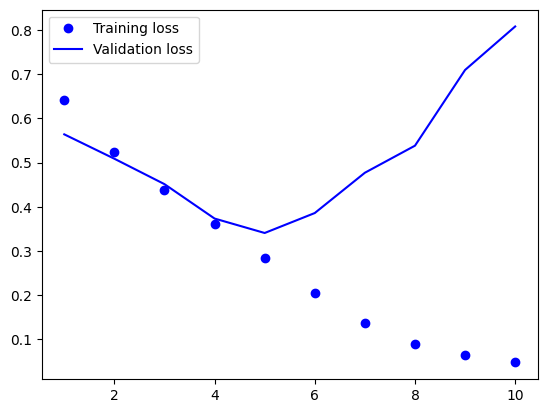

In [70]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

This saves our trained Keras model to a file named 'catvsdog.h5'. This file will contain the model architecture, trained weights, and other necessary information to reproduce and use the model later. It's done after training so that you can load and deploy it for making predictions or further fine-tuning in the future.

In [71]:
model.save('catvsdog.h5')

c:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


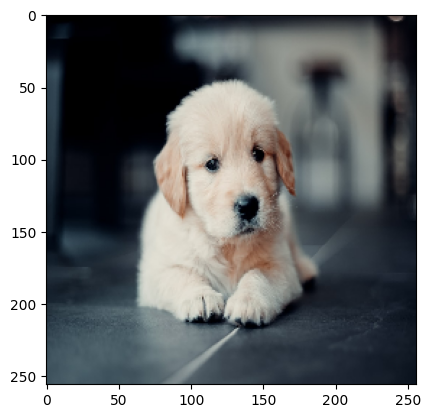

In [72]:
from tensorflow.keras.preprocessing import image

path = r"C:\Users\nikhi\OneDrive\CODE\PYTHON\PROJECTS\ML PROJECTS\Image Classification (CNN)\test_image.jpeg"
img = image.load_img(path,target_size=(256,256))  # Loading and resizing image to a target size of 256x256 pixels.
plt.imshow(img)

In [73]:
import numpy as np
img_array = np.array(img)
img_array.shape     # Checking its shape

(256, 256, 3)

Reshaping the img_array into a 4D array with dimensions (1, 256, 256, 3). This is commonly done in image processing when working with neural networks like convolutional neural networks (CNNs) that require input in this format. It's often used to represent a single image with a height and width of 256 pixels and 3 color channels (RGB).

In [74]:
img_array=img_array.reshape(1,256,256,3)

### Predicting Model

In [75]:
a = model.predict(img_array)
if a==[[0]]:
    print('cat')
else:
    print('dog')

1/1 [==============================] - 0s 86ms/step
dog


### Evaluating Model Performance

In [79]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
test_predictions = model.predict_generator(test_generator)
test_predictions = np.round(test_predictions)  # Convert probabilities to binary predictions (0 or 1)

# Get true labels for the test data
true_labels = test_generator.classes

# Calculate accuracy
accuracy = accuracy_score(true_labels, test_predictions)

# Calculate precision
precision = precision_score(true_labels, test_predictions)

# Calculate recall
recall = recall_score(true_labels, test_predictions)

# Calculate F1-score
f1 = f1_score(true_labels, test_predictions)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


C:\Users\nikhi\AppData\Local\Temp\ipykernel_24372\2511836873.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predictions = model.predict_generator(test_generator)


Accuracy: 0.50
Precision: 0.50
Recall: 0.50
F1-score: 0.50
